In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
data1 = pd.read_csv("census-data-2000-2009.csv", sep=",", encoding='latin-1')

In [8]:
data1.head()

,sumlev,STATE,COUNTY,place,COUSUB,name,STATENAME,POPCENSUS_2000,POPBASE_2000,POP_2000,POP_2001,POP_2002,POP_2003,POP_2004,POP_2005,POP_2006,POP_2007,POP_2008,POP_2009
0,40,1,0,0,0,Alabama,Alabama,4447100,4447382,4451849,4464034,4472420,4490591,4512190,4545049,4597688,4637904,4677464,4708708
1,162,1,0,124,0,Abbeville city,Alabama,2987,2987,2987,2951,2939,2931,2936,2925,2926,2939,2931,2930
2,162,1,0,460,0,Adamsville city,Alabama,4965,5074,5069,5045,5008,4975,4925,4880,4851,4797,4789,4782
3,162,1,0,484,0,Addison town,Alabama,723,723,724,713,711,708,708,708,713,717,711,709
4,162,1,0,676,0,Akron town,Alabama,521,449,449,450,443,441,433,435,434,437,437,433


In [10]:
data2 = pd.read_csv("census-data-2010-2016.csv", sep=",", encoding='latin-1')

In [11]:
data2.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
0,40,1,0,0,0,0,0,A,Alabama,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,2688,2688,2683,2685,2647,2631,2619,2616,2603
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,4522,4522,4517,4495,4472,4447,4428,4395,4360
3,162,1,0,484,0,0,0,A,Addison town,Alabama,758,756,754,753,748,748,747,740,738
4,162,1,0,676,0,0,0,A,Akron town,Alabama,356,356,355,345,345,342,337,337,334


# convert columns into rows...

In [12]:
data1t = pd.melt(data1, id_vars=["sumlev", "STATE", "COUNTY", "place", "COUSUB", "name", "STATENAME"],
                 var_name="Date", 
                 value_name="Value")

In [52]:
data2t = pd.melt(data2, id_vars=["SUMLEV", "STATE", "COUNTY", "PLACE", "COUSUB", "CONCIT", "PRIMGEO_FLAG", "FUNCSTAT", "NAME", "STNAME"], 
                 var_name="Date", 
                 value_name="Value")

In [53]:
data2t.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,Date,Value
0,40,1,0,0,0,0,0,A,Alabama,Alabama,CENSUS2010POP,4779736
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,CENSUS2010POP,2688
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,CENSUS2010POP,4522
3,162,1,0,484,0,0,0,A,Addison town,Alabama,CENSUS2010POP,758
4,162,1,0,676,0,0,0,A,Akron town,Alabama,CENSUS2010POP,356


In [25]:
cityName = "Baltimore city"

In [26]:
cityData = data1t[(data1t.sumlev==162) & (data1t.name==cityName) & (data1t.Date.str.contains("POP_"))]

In [56]:
cityData[['name', 'STATENAME', 'Date', 'Value']]

,name,STATENAME,Date,Value
191291,Baltimore city,Maryland,2000,648654
272994,Baltimore city,Maryland,2001,645253
354697,Baltimore city,Maryland,2002,642246
436400,Baltimore city,Maryland,2003,642324
518103,Baltimore city,Maryland,2004,641004
599806,Baltimore city,Maryland,2005,640064
681509,Baltimore city,Maryland,2006,640961
763212,Baltimore city,Maryland,2007,640150
844915,Baltimore city,Maryland,2008,638091
926618,Baltimore city,Maryland,2009,637418


In [41]:
cityData['Date'] = cityData['Date'].str.replace("POP_","")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
cityData

,sumlev,STATE,COUNTY,place,COUSUB,name,STATENAME,Date,Value
191291,162,24,0,4000,0,Baltimore city,Maryland,2000,648654
272994,162,24,0,4000,0,Baltimore city,Maryland,2001,645253
354697,162,24,0,4000,0,Baltimore city,Maryland,2002,642246
436400,162,24,0,4000,0,Baltimore city,Maryland,2003,642324
518103,162,24,0,4000,0,Baltimore city,Maryland,2004,641004
599806,162,24,0,4000,0,Baltimore city,Maryland,2005,640064
681509,162,24,0,4000,0,Baltimore city,Maryland,2006,640961
763212,162,24,0,4000,0,Baltimore city,Maryland,2007,640150
844915,162,24,0,4000,0,Baltimore city,Maryland,2008,638091
926618,162,24,0,4000,0,Baltimore city,Maryland,2009,637418


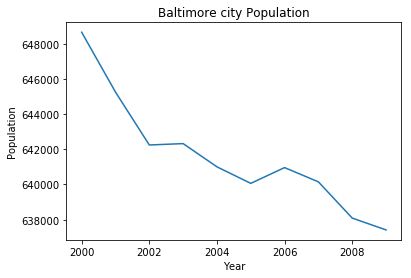

In [50]:
plt.plot(cityData.Date.astype('int'), cityData.Value)
plt.title("{} Population".format(cityName))
plt.ylabel("Population")
plt.xlabel("Year")